In [5]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)

## **Introduction**

Students who participate in extracurricular activities, such as regular artistic or physical activities, can gain additional transferable skills. Yet, there are concerns that this involvement may come at the cost of dedicating less time to academic studies, leading to negative performance in school. However, an analytical research paper by Ribeiro (2023) reveals that the majority of past clinical trials found a positive correlation between extracurricular activities and academic success. Extracurricular activities had benefits for mental health and suicide prevention among college students, contributing to better grades in school. Similarly, another study found that it enhances leadership, time management, and social skills, ultimately contributing to improved academic performance (Christison, 2013). A study by Wang (2023) found that students who participated in extracurricular activities received similar grades as students who did not, suggesting that participation in extracurricular activities does not compromise academic performance. Collectively, these studies consistently show a positive correlation between extracurricular activities and academic success. Our statistical analysis aims to confirm the validity of this trend.

The dataset comprises records of 145 students, detailing demographic data, extracurricular activities, study habits, and academic performance. Key features include students' backgrounds, involvement in artistic or sports activities, study behaviors such as weekly study hours, and performance measures like GPA. Each entry captures the balance between a student's personal life, such as work commitments and family background, and their academic endeavors. The dataset also quantifies the intensity of their study practices and their effectiveness, as reflected in course grades and GPA. With this information, the dataset is poised to offer valuable insights into how extracurricular activities may influence or correlate with students' academic achievements.

## **Preliminary Results**

In [2]:
url <- "https://raw.githubusercontent.com/PeterYuLi1204/STAT-201-Project/main/StudentsPerformance_with_headers.csv" 
student_data <- read_csv(url)

student_data_cleaned <- student_data
colnames(student_data_cleaned) <- make.names(colnames(student_data), unique = TRUE)
student_data_cleaned <- student_data_cleaned |>
    mutate(Regular.artistic.or.sports.activity = cut(Regular.artistic.or.sports.activity, 2, c("yes", "no")))

head(student_data_cleaned)

New names:
• `Reading frequency` -> `Reading frequency...19`
• `Reading frequency` -> `Reading frequency...20`
Rows: 145 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): STUDENT ID
dbl (32): Student Age, Sex, Graduated high-school type, Scholarship type, Ad...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STUDENT.ID,Student.Age,Sex,Graduated.high.school.type,Scholarship.type,Additional.work,Regular.artistic.or.sports.activity,Do.you.have.a.partner,Total.salary.if.available,Transportation.to.the.university,⋯,Preparation.to.midterm.exams.1,Preparation.to.midterm.exams.2,Taking.notes.in.classes,Listening.in.classes,Discussion.improves.my.interest.and.success.in.the.course,Flip.classroom,Cumulative.grade.point.average.in.the.last.semester...4.00.,Expected.Cumulative.grade.point.average.in.the.graduation...4.00.,COURSE.ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,no,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,no,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,no,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,no,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,no,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,no,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


The data is in tidy format but the numerical values in the ```Regular.artistic.or.sports.activity``` column have been changed to a factor to better reflect the represented values. However, our ```GRADE``` variable has be left as numerical for calculating means but they represent average letter grade ranges (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA).

In [3]:
activity_means <- student_data_cleaned |>
    filter(Regular.artistic.or.sports.activity %in% c("yes", "no")) |>
    select(Regular.artistic.or.sports.activity, GRADE) |>
    group_by(Regular.artistic.or.sports.activity) |>
    summarize(mean_grade = mean(GRADE), n = n())

activity_means

Regular.artistic.or.sports.activity,mean_grade,n
<fct>,<dbl>,<int>
yes,3.396552,58
no,3.114943,87


Both sample sizes are **sufficiently large (n > 30) for the CLT to apply** and the sample mean grade of students that participate in regular artistic or sports activities is **greater** than those who do not.

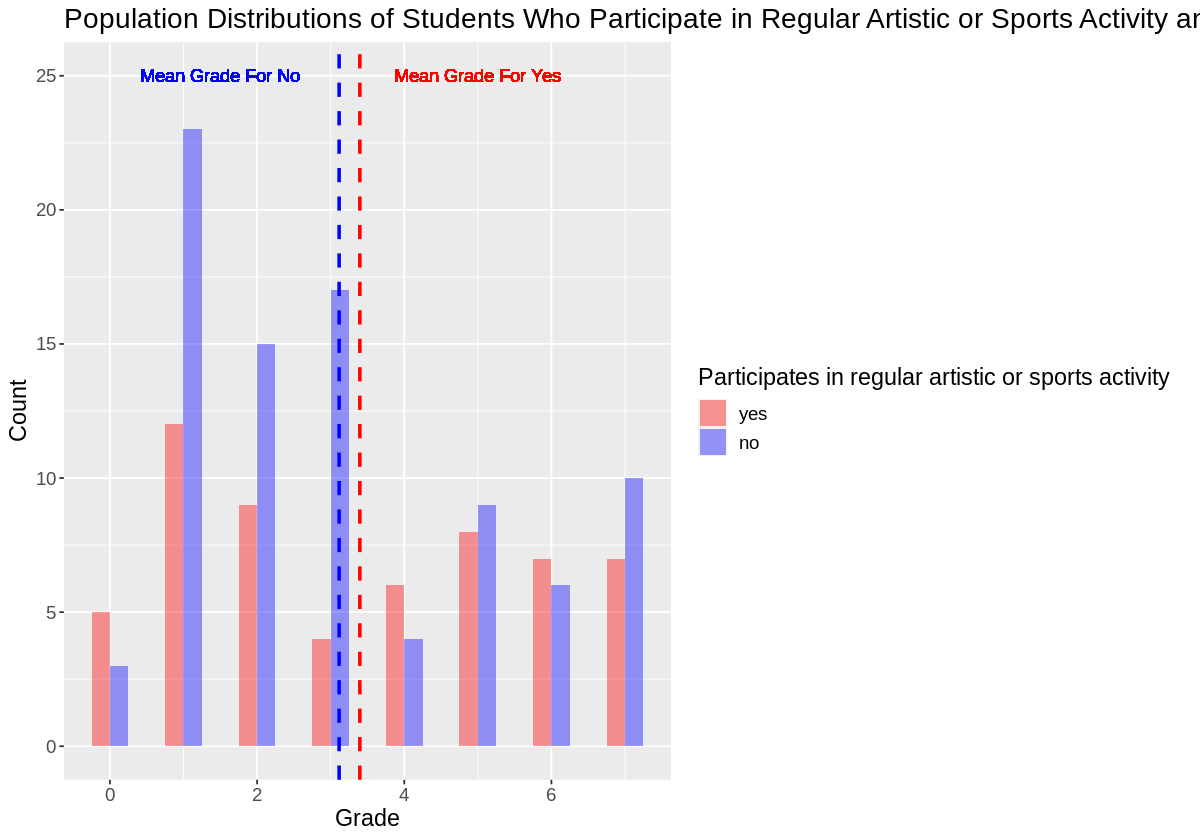

In [4]:
activity_grades <- student_data_cleaned |>
    filter(Regular.artistic.or.sports.activity %in% c("yes", "no")) |>
    select(Regular.artistic.or.sports.activity, GRADE)

options(repr.plot.width=10, repr.plot.height=7)

activity_grades_plot <- activity_grades |>
    ggplot() +
    geom_histogram(aes(x = GRADE, fill = Regular.artistic.or.sports.activity), alpha = 0.4, position = "dodge", binwidth = 0.5) +
    geom_vline(xintercept = activity_means$mean_grade[1], color = "red", linetype = "dashed", linewidth = 1) +
    geom_vline(xintercept = activity_means$mean_grade[2], color = "blue", linetype = "dashed", linewidth = 1) +
    scale_fill_manual(values = c("red", "blue")) +
    labs(fill = "Participates in regular artistic or sports activity", title = "Population Distributions of Students Who Participate in Regular Artistic or Sports Activity and Those Who Do Not", x = "Grade", y = "Count") +
    geom_text(aes(x = 1.5, y = 25, label = "Mean Grade For No"), color = "blue") +
    geom_text(aes(x = 5, y = 25, label = "Mean Grade For Yes"), color = "red") +
    theme(text = element_text(size = 14))

activity_grades_plot

Above is the population distribution for students who participate in regular artistic or sports activity and those who do not with dashed-lines representing the calculated mean grades for each sample. We can observe that both samples **do not have normal distributions** and appear to be **bimodal**. However, the CLT will still apply for difference in means as our sample sizes are **sufficiently large**. Since the mean grade for students who do participate appears to be greater than the mean for students who do not, we will have to apply a hypothesis test to confirm whether this **difference is significant**.

##  **Methods and Plan**

This report harnesses a well-structured dataset, representing a diverse cohort of 145 students, to analyze the correlation between extracurricular activities and academic achievement. The data is robust, encompassing comprehensive variables from personal backgrounds to detailed academic records, ensuring a trustworthy and multifaceted examination of the subject matter. The preliminary results, coupled with the meticulous data preparation outlined, establish a solid foundation for our analysis, instilling confidence in the forthcoming conclusions.

However, while the plots and estimates generated provide a visual and quantitative perspective, they alone may not encapsulate the complete narrative or contextual subtleties behind the data. To bridge this gap, our report will also incorporate a statistical analysis plan that will allow stakeholders to discern not just the trends, but also the statistical significance and potential causal inferences, thereby enabling more informed decision-making.


## **Hypothesis Formulation**

Location Parameter:

$H_{0}: \mu_{yes} = \mu_{no}$

$H_{1}: \mu_{yes} \ne \mu_{no}$



$H_{0}: \sigma_{yes} = \sigma_{no}$

$H_{1}: \sigma_{yes} \ne \sigma_{no}$


## **Statistical Analysis Plan**

To compare the mean grades between the two groups, we will implement the following:

1. Acquire the observed test statistic: this requires us to obtain the average cumulative GPA of students who had regular artistic or sports activities versus students who did no extracurricular activity and subtract the means.
2. Use Infer workflow to create null distribution of difference in means.
3. From there, we will visualize the null distribution and display the observed statistic along with its associated p-value.
4. Then, we will calculate the P-value to determine whether or not to reject our null hypothesis.
5. Furthermore, we would find the 95% confidence interval by creating a bootstrap distribution from our original sample. We would find the upper and lower limits of the CI using the percentile method.
6. Next, we would see if the expected value of the null hypothesis (= 0) fits with the boundaries of the 95% confidence interval to further ratify our results.

## **Expected Outcomes and Impact**
We expect there to be a statistically significant difference in average cumulative GPAs of students who do extracurricular activities versus those who do not. Based on previous studies, we expect that students who do extracurricular activities to have higher GPAs on average. In the event that this prediction is true, students ought to be encouraged to undertake creative/athletic pursuits alongside their education.These findings could inspire educational institutions to create more athletic/artistic initiatives which could be positively impactful for students' academic success.

## **Future Directions**

Should our analysis reveal significant differences in academic performance between students participating in extracurricular activities and those who do not, the following future research directions could be pursued:

**Cross-Disciplinary Skills Development:** Examine the role of extracurricular activities in developing cross-disciplinary skills, such as critical thinking and problem-solving, and how these skills transfer to academic success in core subjects, potentially influencing curriculum design.

**Global Comparative Analysis:** Explore how cultural and educational system differences impact the relationship between extracurricular activities and academic performance by conducting cross-cultural studies, which could inform international educational policies and program implementations.

## **References**

Christison, C. (2013). The benefits of participating in extracurricular activities. BU Journal of Graduate Studies in Education, 5(2), 17.

Ribeiro, N., Malafaia, C., Neves, T., & Menezes, I. (2023). The impact of extracurricular activities on university students' academic success and employability. European Journal of Higher Education, ahead-of-print(ahead-of-print), 1-21. https://doi.org/10.1080/21568235.2023.2202874

Wang, D., Xiong, R., Zhang, J., Han, X., Jin, L., Liu, W., Qu, Y., Chen, Q., Chen, S., Chen, X., Li, Y., He, M., Zeng, Y., & Liu, Y. (2023). Effect of extracurricular after-school physical activities on academic performance of schoolchildren: A cluster randomized clinical trial. JAMA Pediatrics, https://doi.org/10.1001/jamapediatrics.2023.3615
